In [27]:
import numpy as np
import pandas as pd

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle

In [5]:
games=pd.read_csv("AllLeagues.csv")
games=shuffle(games)

In [6]:
features=games.loc[:,"Wins":]
targets=games[["FTR"]]
X_train,X_test,Y_train,Y_test=train_test_split(features,targets,test_size=0.1)
#stratify=targets
X_train.shape,Y_train.shape

((35943, 32), (35943, 1))

In [14]:
class_mapping = {'H': 0, 'D': 1, 'A': 2}
Y_train=Y_train.replace(class_mapping)
Y_train

,FTR
12171,0
18631,2
6299,1
9922,0
19525,2
...,...
11814,1
36226,0
6418,2
37612,0


In [21]:
xgb=XGBClassifier(objective="multi:softmax")
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [22]:
Y_test=Y_test.replace(class_mapping)

In [23]:
res=xgb.predict(X_test)

In [24]:
f1_score(Y_test,res,average="micro")

0.5753630445668503

In [29]:
cv_params={"max_depth":[4,5,6,7,8],"min_child_weight":[1,2,3,4,5],"learning_rate":[0.1,0.2,0.3],"n_estimators":[75,100,125]}
scorers={"f1_micro"}

In [30]:
cv_params={"max_depth":[4,5,6,7,8],"min_child_weight":[1,2,3,4,5],"learning_rate":[0.1,0.2,0.3],"n_estimators":[75,100,125]}
scorers={"f1_micro"}
xgb2=XGBClassifier(objective="multi:softmax")
cv=GridSearchCV(xgb2,cv_params,scoring=scorers,cv=4,refit="f1_micro")

In [31]:
%%time
cv.fit(X_train,Y_train)

CPU times: user 6h 23min 15s, sys: 1min 13s, total: 6h 24min 28s
Wall time: 53min 28s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

In [33]:
cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [34]:
cv.best_score_

0.591046989436731

In [35]:
cv_params={"max_depth":[20,None],"min_child_weight":[3,4],"learning_rate":[0.15,0.17],"n_estimators":[125,150]}
scorers={"f1_micro"}
xgb3=XGBClassifier(objective="multi:softmax")
cv2=GridSearchCV(xgb3,cv_params,scoring=scorers,cv=4,refit="f1_micro")

In [36]:
%%time
cv2.fit(X_train,Y_train)

CPU times: user 19h 14min 13s, sys: 3min 39s, total: 19h 17min 52s
Wall time: 2h 42min 51s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

In [37]:
cv2.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [38]:
cv2.best_score_

0.6013966634055498

In [39]:
cv_params={"max_depth":[20,None],"min_child_weight":[3,4],"learning_rate":[0.15,0.17],"n_estimators":[125,150]}
scorers={"f1_micro"}
xgb3=XGBClassifier(objective="multi:softmax")
cv2=GridSearchCV(xgb3,cv_params,scoring=scorers,cv=4,refit="f1_micro")

In [40]:
%%time
cv2.fit(X_train,Y_train)

CPU times: user 2h 19min 10s, sys: 30.9 s, total: 2h 19min 41s
Wall time: 19min 56s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

In [41]:
cv2.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [42]:
cv2.best_score_

0.6013966634055498

In [45]:
a=cv2.predict(X_test)

In [46]:
f1_score(Y_test,a,average="micro")

0.64421632448673

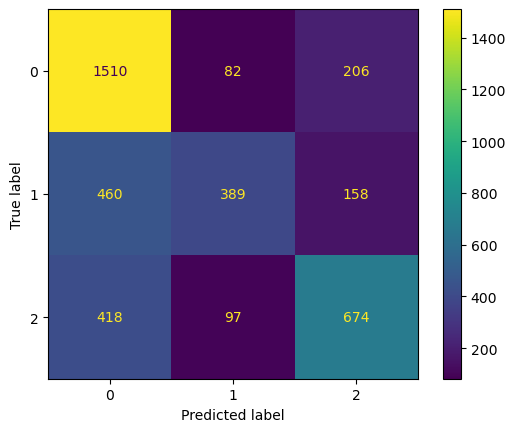

In [48]:
cm=confusion_matrix(Y_test,a,labels=[0,1,2])
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
disp.plot()
plt.show()